In [1]:
#Jul 15, 2025
#Author : Diksha Aswal

##### In Experiment 2, we successfully demonstrated that a diverse size distribution (higher standard deviation in diameters) helps achieve better packing efficiency. However, we noticed that many placement attempts failed near the later stages of the simulation, as space became limited. The simulation was terminated after a fixed number of failed attempts (total_skips = 100), potentially prematurely halting the simulation while space was still available for smaller circles.

##### This observation motivated Experiment 3, which investigates the effect of varying the total_skips threshold on the final packing efficiency. The total_skips parameter controls how many circles the algorithm is allowed to skip (i.e., fail to place) before terminating the simulation. By increasing this value, we aim to allow the algorithm more chances to place additional circles

In [1]:
#Experiment No.3

#random allocation of circle on a shaeet without overlapping
#distribution of circles (Normal Distribution)
## mean diameter = 40
## std of diameter = 10
## lower limit on diameter = 0
## higher limit on diameter = 80

# dimension of the sheet
# 500 X 500

In [5]:
from utility_functions import generate_diameters, place_circles_bc1, save_circles, save_attempts, calculate_packing_efficiency
from graphing_tools import plot_circles, plot_distribution
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import truncnorm
from collections import defaultdict
import time


In [7]:
# --- Simulation Parameters ---


# Sheet dimensions
sheet_width = 500
sheet_height = 500

# Circle Distribution parameters
mean_diameter = 40
std_diameter = 10
min_diameter = 0
max_diameter = 80


population_size = 1000000          # Number of diameters to generate
total_skips = 200                  # Number of failed full tries before exiting
max_attempts = 250000              # Max attempts per circle before skipping

allocated_circles = []             # List of successfully placed circles
attempts_dict = defaultdict(int)   # Tracks how many attempts it took to place each circle

In [ ]:
raw_diameters = generate_diameters(population_size, mean_diameter, std_diameter)
truncated_diameters = raw_diameters[(raw_diameters >= min_diameter) & (raw_diameters <= max_diameter)]
allocated_circles, attempts_dict = place_circles_bc1(truncated_diameters, total_skips, max_attempts, sheet_width, sheet_height)


In [13]:
save_circles(allocated_circles, 'data/allocated_circles_Experiment3a.csv')
save_attempts(attempts_dict, 'data/attempts_distribution_Experiment3a.csv')

In [15]:

total_skips = 500


In [ ]:
raw_diameters = generate_diameters(population_size, mean_diameter, std_diameter)
truncated_diameters = raw_diameters[(raw_diameters >= min_diameter) & (raw_diameters <= max_diameter)]
allocated_circles, attempts_dict = place_circles_bc1(truncated_diameters, total_skips, max_attempts, sheet_width, sheet_height)


In [19]:
save_circles(allocated_circles, 'data/allocated_circles_Experiment3b.csv')
save_attempts(attempts_dict, 'data/attempts_distribution_Experiment3b.csv')

In [55]:

total_skips = 1000


In [ ]:
print(time.time())
raw_diameters = generate_diameters(population_size, mean_diameter, std_diameter)
truncated_diameters = raw_diameters[(raw_diameters >= min_diameter) & (raw_diameters <= max_diameter)]
allocated_circles, attempts_dict = place_circles_bc1(truncated_diameters, total_skips, max_attempts, sheet_width, sheet_height)
print(time.time())

In [59]:
save_circles(allocated_circles, 'data/allocated_circles_Experiment3c.csv')
save_attempts(attempts_dict, 'data/attempts_distribution_Experiment3c.csv')

In [93]:

total_skips = 2000


In [ ]:
print(time.time())
raw_diameters = generate_diameters(population_size, mean_diameter, std_diameter)
truncated_diameters = raw_diameters[(raw_diameters >= min_diameter) & (raw_diameters <= max_diameter)]
allocated_circles, attempts_dict = place_circles_bc1(truncated_diameters, total_skips, max_attempts, sheet_width, sheet_height)
print(time.time())

In [97]:
save_circles(allocated_circles, 'data/allocated_circles_Experiment3d.csv')
save_attempts(attempts_dict, 'data/attempts_distribution_Experiment3d.csv')

In [55]:
allocated_circles_2a = pd.read_csv('data/allocated_circles_Experiment2a.csv')
allocated_circles_3a = pd.read_csv('data/allocated_circles_Experiment3a.csv')
allocated_circles_3b = pd.read_csv('data/allocated_circles_Experiment3b.csv')
allocated_circles_3c = pd.read_csv('data/allocated_circles_Experiment3c.csv')
allocated_circles_3d = pd.read_csv('data/allocated_circles_Experiment3d.csv')

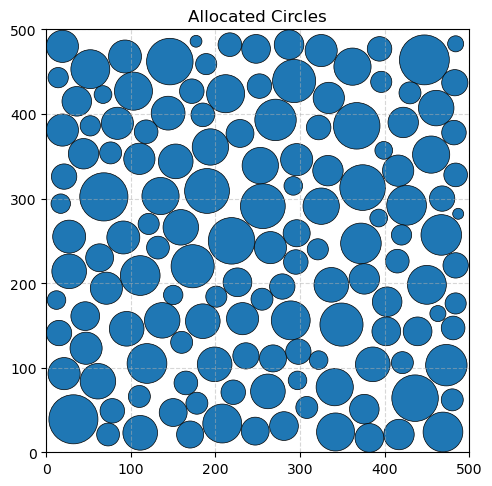

In [18]:
 plot_circles(sheet_width, sheet_height, allocated_circles_2a)

In [20]:
packing_efficiency = calculate_packing_efficiency(sheet_width, sheet_height, allocated_circles_2a)
print(f"Packing Efficiency: {packing_efficiency:.4f} ({packing_efficiency*100:.2f}%)")

Packing Efficiency: 0.6169 (61.69%)


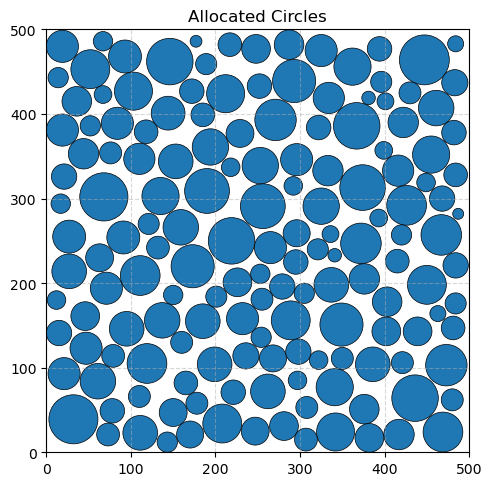

In [22]:
 plot_circles(sheet_width, sheet_height, allocated_circles_3a)

In [24]:
packing_efficiency = calculate_packing_efficiency(sheet_width, sheet_height, allocated_circles_3a)
print(f"Packing Efficiency: {packing_efficiency:.4f} ({packing_efficiency*100:.2f}%)")

Packing Efficiency: 0.6395 (63.95%)


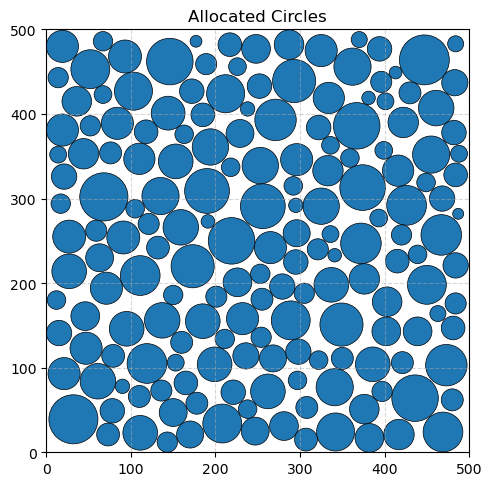

In [26]:
 plot_circles(sheet_width, sheet_height, allocated_circles_3b)

In [28]:
packing_efficiency = calculate_packing_efficiency(sheet_width, sheet_height, allocated_circles_3b)
print(f"Packing Efficiency: {packing_efficiency:.4f} ({packing_efficiency*100:.2f}%)")

Packing Efficiency: 0.6664 (66.64%)


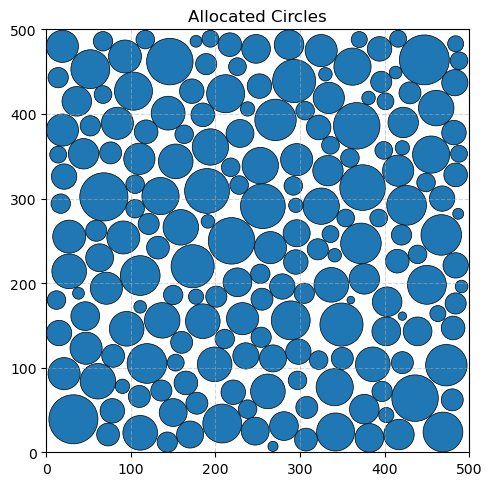

In [30]:
 plot_circles(sheet_width, sheet_height, allocated_circles_3c)

In [32]:
packing_efficiency = calculate_packing_efficiency(sheet_width, sheet_height, allocated_circles_3c)
print(f"Packing Efficiency: {packing_efficiency:.4f} ({packing_efficiency*100:.2f}%)")

Packing Efficiency: 0.6846 (68.46%)


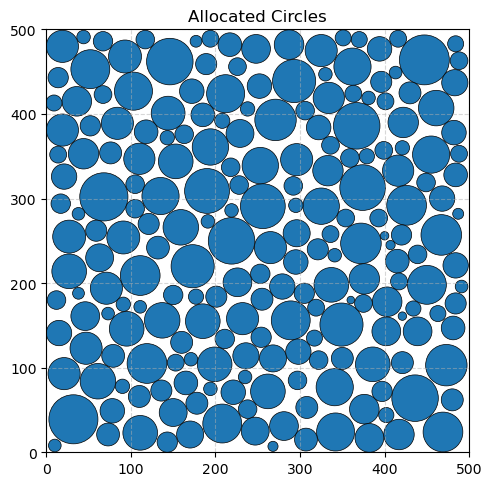

In [34]:
 plot_circles(sheet_width, sheet_height, allocated_circles_3d)

In [36]:
packing_efficiency = calculate_packing_efficiency(sheet_width, sheet_height, allocated_circles_3d)
print(f"Packing Efficiency: {packing_efficiency:.4f} ({packing_efficiency*100:.2f}%)")

Packing Efficiency: 0.7049 (70.49%)


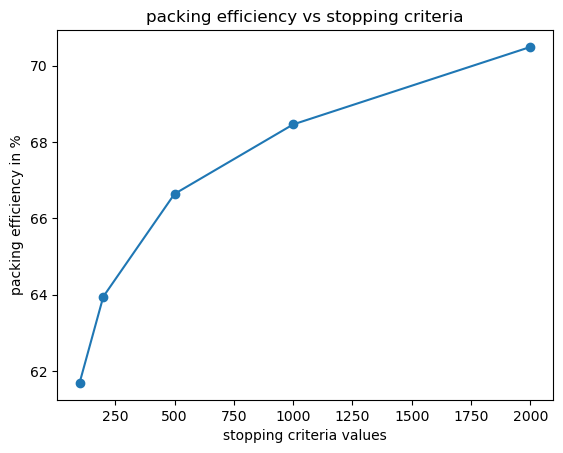

In [38]:
pack_eff = [61.69,63.95, 66.64, 68.46, 70.49]
stop_criteria = [100, 200, 500, 1000, 2000]
plt.plot(stop_criteria, pack_eff,marker='o' )
plt.xlabel("stopping criteria values")
plt.ylabel("packing efficiency in %")
plt.title("packing efficiency vs stopping criteria")
plt.show()

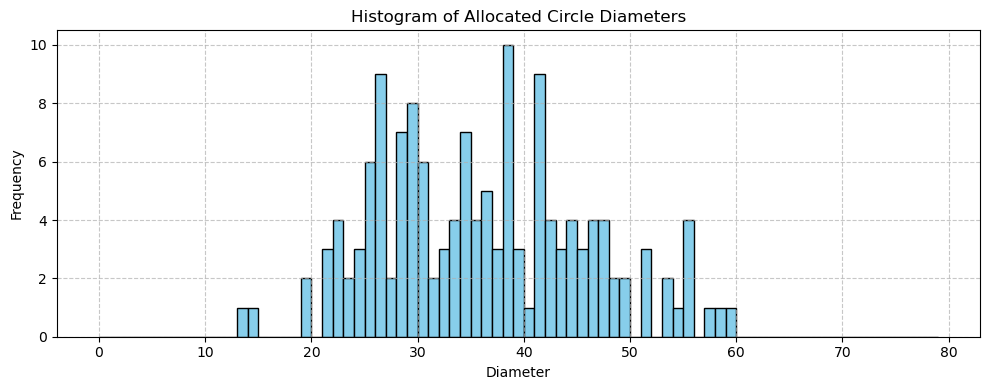

In [57]:
plot_distribution(min_diameter, max_diameter, allocated_circles_2a)

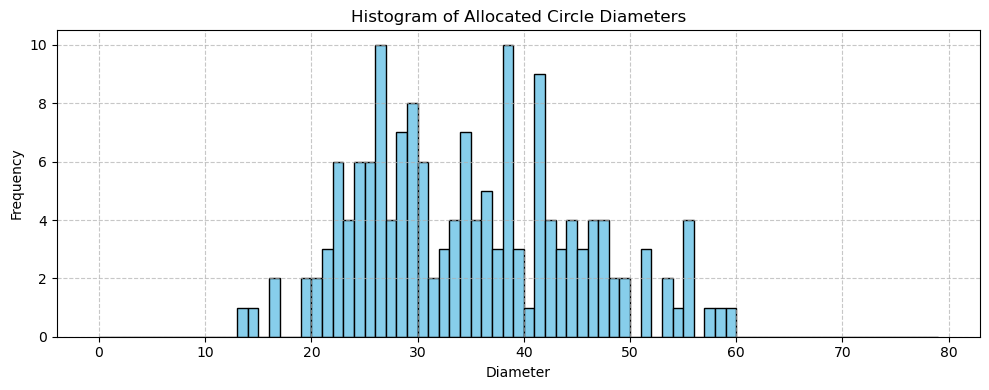

In [59]:
plot_distribution(min_diameter, max_diameter, allocated_circles_3a)

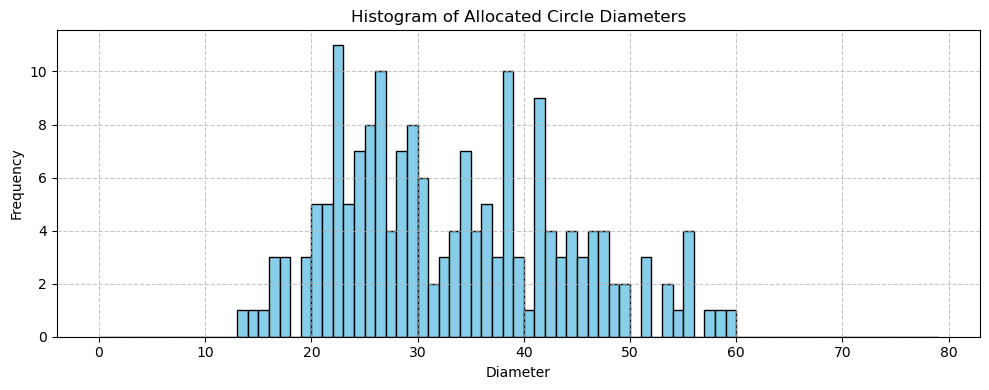

In [61]:
plot_distribution(min_diameter, max_diameter,allocated_circles_3b)

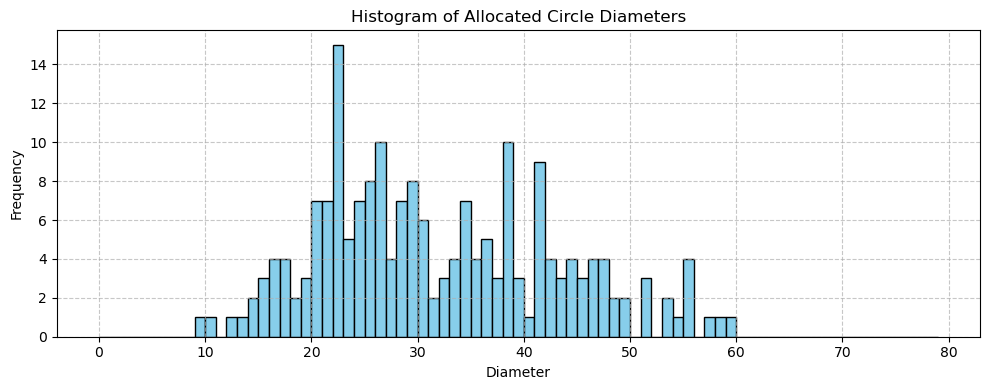

In [63]:
plot_distribution(min_diameter, max_diameter, allocated_circles_3c)

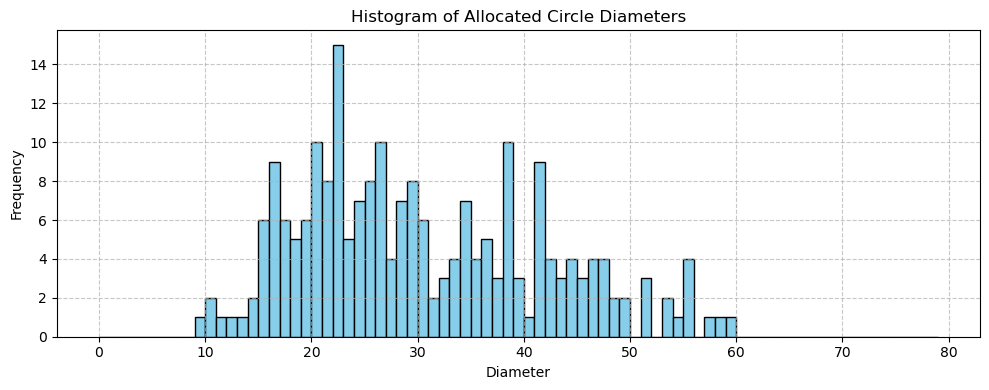

In [65]:
plot_distribution(min_diameter, max_diameter, allocated_circles_3d)

##### In Experiment 3, we investigated how increasing the stopping criteria (total_skips) impacts packing efficiency by allowing the simulation to tolerate more failed placement attempts before termination. As total_skips increased from 100 to 2000, packing efficiency improved significantly from 61.69% to 70.49%, demonstrating that allowing more placement retries helps utilize residual spaces, especially by fitting smaller circles into tighter gaps. 

#####  However, a notable side effect emerged: the mean diameter of successfully placed circles shifted downward from the intended mean of 40, indicating a bias toward smaller circles in later stages of the simulation. This occurs because as the sheet fills up, it becomes increasingly difficult to fit larger circles, causing the algorithm to preferentially succeed in placing smaller ones. Since our goal is not only to maximize packing efficiency but also to preserve the original statistical properties of the diameter distribution, this bias is undesirable.